In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import torch
import cv2
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import pandas as pd

currentDirPath = "./drive/MyDrive/Software udvikling/DeepLearning/Eksamen/"

In [29]:
class ImageDataset(Dataset):
    def __init__(self, csv, train, test):
        self.csv = csv
        self.train = train
        self.test = test
        self.all_image_names = self.csv[:]['img_id']
        self.all_labels = np.array(self.csv.drop(['img_id', 'text', 'Numbers'], axis=1))
        self.train_ratio = 10
        self.valid_ratio = 20
        # set the training data images and labels
        if self.train == True:
            print(f"Number of training images: {self.train_ratio}")
            self.image_names = list(self.all_image_names[:self.train_ratio])
            self.labels = list(self.all_labels[:self.train_ratio])
            # define the training transforms
            self.transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((400, 400)),
                transforms.RandomHorizontalFlip(p=0.5),
                transforms.RandomRotation(degrees=45),
                transforms.ToTensor(),
            ])
        # set the validation data images and labels
        elif self.train == False and self.test == False:
            print(f"Number of validation images: {self.valid_ratio}")
            self.image_names = list(self.all_image_names[-self.valid_ratio:-10])
            self.labels = list(self.all_labels[-self.valid_ratio:])
            # define the validation transforms
            self.transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((400, 400)),
                transforms.ToTensor(),
            ])
        # set the test data images and labels, only last 10 images
        # this, we will use in a separate inference script
        elif self.test == True and self.train == False:
            self.image_names = list(self.all_image_names[-10:])
            self.labels = list(self.all_labels[-10:])
             # define the test transforms
            self.transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.ToTensor(),
            ])
    def __len__(self):
        return len(self.image_names)
    
    def __getitem__(self, index):
        image = cv2.imread(currentDirPath + f"TrainingData/D2/Images/{self.image_names[index]}")
        # convert the image from BGR to RGB color format
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # apply image transforms
        image = self.transform(image)
        targets = self.labels[index]
        
        return {
            'image': torch.tensor(image, dtype=torch.float32),
            'label': torch.tensor(targets, dtype=torch.float32)
        }

In [18]:
from sklearn.preprocessing import OneHotEncoder

csv = pd.read_csv(currentDirPath + "TrainingData/D2/D2.csv")

dropList = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
#print(csv.loc[0][1])
array = []
zeroCombined = []
oneCombined = []
twoCombined = []
threeCombined = []
fourCombined = []
fiveCombined = []
sixCombined = []
sevenCombined = []
eightCombined = []
nineCombined = []

for index, row in csv.iterrows():
  oneHotNumbers = [0,0,0,0,0,0,0,0,0,0]
  zeroArray = 0
  oneArray = 0
  twoArray = 0
  threeArray = 0
  fourArray = 0
  fiveArray = 0
  sixArray = 0
  sevenArray = 0
  eightArray = 0
  nineArray = 0
  for char in row['text']:
    if char.isdigit():
      if int(char) == 0:
        oneHotNumbers[0] = 1
        zeroArray = 1

      if int(char) == 1:
        oneHotNumbers[1] = 1
        oneArray = 1

      if int(char) == 2:
        oneHotNumbers[2] = 1
        twoArray = 1

      if int(char) == 3:
        oneHotNumbers[3] = 1
        threeArray = 1

      if int(char) == 4:
        oneHotNumbers[4] = 1
        fourArray = 1

      if int(char) == 5:
        oneHotNumbers[5] = 1
        fiveArray = 1

      if int(char) == 6:
        oneHotNumbers[6] = 1
        sixArray = 1

      if int(char) == 7:
        oneHotNumbers[7] = 1
        sevenArray = 1

      if int(char) == 8:
        oneHotNumbers[8] = 1
        eightArray = 1

      if int(char) == 9:
        oneHotNumbers[9] = 1
        nineArray = 1

  array.append(oneHotNumbers)
  zeroCombined.append(zeroArray)
  oneCombined.append(oneArray)
  twoCombined.append(twoArray)
  threeCombined.append(threeArray)
  fourCombined.append(fourArray)
  fiveCombined.append(fiveArray)
  sixCombined.append(sixArray)
  sevenCombined.append(sevenArray)
  eightCombined.append(eightArray)
  nineCombined.append(nineArray)


df = pd.DataFrame({"Numbers": array})
final_df = csv.join(df)

dfZero = pd.DataFrame({0: zeroCombined})
final_df = final_df.join(dfZero)

dfOne = pd.DataFrame({1: oneCombined})
final_df = final_df.join(dfOne)

dfTwo = pd.DataFrame({2: twoCombined})
final_df = final_df.join(dfTwo)

dfThree = pd.DataFrame({3: threeCombined})
final_df = final_df.join(dfThree)

dfFour = pd.DataFrame({4: fourCombined})
final_df = final_df.join(dfFour)

dfFive = pd.DataFrame({5: fiveCombined})
final_df = final_df.join(dfFive)

dfSix = pd.DataFrame({6: sixCombined})
final_df = final_df.join(dfSix)

dfSeven = pd.DataFrame({7: sevenCombined})
final_df = final_df.join(dfSeven)

dfEight = pd.DataFrame({8: eightCombined})
final_df = final_df.join(dfEight)

dfNine = pd.DataFrame({9: nineCombined})
final_df = final_df.join(dfNine)

final_df.to_csv(currentDirPath + "TrainingData/D2/D2_OHE.csv", index=False)


# for index, row in csv.iterrows():
#     print(row['c1'], row['c2'])

In [6]:
from torchvision import models as models
import torch.nn as nn
def mymodel(pretrained, requires_grad):
    model = models.resnet50(progress=True, pretrained=pretrained)
    # to freeze the hidden layers
    if requires_grad == False:
        for param in model.parameters():
            param.requires_grad = False
    # to train the hidden layers
    elif requires_grad == True:
        for param in model.parameters():
            param.requires_grad = True
    # make the classification layer learnable
    # we have 25 classes in total
    model.fc = nn.Linear(2048, 10)
    return model

In [7]:
import torch
from tqdm import tqdm
# training function
def train(model, dataloader, optimizer, criterion, train_data, device):
    print('Training')
    model.train()
    counter = 0
    train_running_loss = 0.0
    for i, data in tqdm(enumerate(dataloader), total=int(len(train_data)/dataloader.batch_size)):
        counter += 1
        data, target = data['image'].to(device), data['label'].to(device)
        optimizer.zero_grad()
        outputs = model(data)
        # apply sigmoid activation to get all the outputs between 0 and 1
        outputs = torch.sigmoid(outputs)
        loss = criterion(outputs, target)
        train_running_loss += loss.item()
        # backpropagation
        loss.backward()
        # update optimizer parameters
        optimizer.step()
        
    train_loss = train_running_loss / counter
    return train_loss

In [8]:
# validation function
def validate(model, dataloader, criterion, val_data, device):
    print('Validating')
    model.eval()
    counter = 0
    val_running_loss = 0.0
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=int(len(val_data)/dataloader.batch_size)):
            counter += 1
            data, target = data['image'].to(device), data['label'].to(device)
            outputs = model(data)
            # apply sigmoid activation to get all the outputs between 0 and 1
            outputs = torch.sigmoid(outputs)
            loss = criterion(outputs, target)
            val_running_loss += loss.item()
        
        val_loss = val_running_loss / counter
        return val_loss

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from torch.utils.data import DataLoader
matplotlib.style.use('ggplot')
# initialize the computation device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [20]:
#intialize the model
model = mymodel(pretrained=True, requires_grad=False).to(device)
# learning parameters
lr = 0.01
epochs = 5
batch_size = 2
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.BCELoss()

# Ny sektion

In [30]:
# read the training csv file
train_csv = pd.read_csv(currentDirPath + "TrainingData/D2/D2_OHE.csv")
# train dataset
train_data = ImageDataset(
    train_csv, train=True, test=False
)
# validation dataset
valid_data = ImageDataset(
    train_csv, train=False, test=False
)
# train data loader
train_loader = DataLoader(
    train_data, 
    batch_size=batch_size,
    shuffle=True
)
# validation data loader
valid_loader = DataLoader(
    valid_data, 
    batch_size=batch_size,
    shuffle=False
)

Number of training images: 10
Number of validation images: 20


In [31]:
# start the training and validation
train_loss = []
valid_loss = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(
        model, train_loader, optimizer, criterion, train_data, device
    )
    valid_epoch_loss = validate(
        model, valid_loader, criterion, valid_data, device
    )
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f'Val Loss: {valid_epoch_loss:.4f}')

Epoch 1 of 5
Training


100%|██████████| 5/5 [00:07<00:00,  1.43s/it]


Validating


100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


Train Loss: 1.1646
Val Loss: 1.4513
Epoch 2 of 5
Training


100%|██████████| 5/5 [00:06<00:00,  1.39s/it]


Validating


100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


Train Loss: 0.9963
Val Loss: 1.2631
Epoch 3 of 5
Training


100%|██████████| 5/5 [00:06<00:00,  1.37s/it]


Validating


100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


Train Loss: 1.2966
Val Loss: 1.0219
Epoch 4 of 5
Training


100%|██████████| 5/5 [00:06<00:00,  1.38s/it]


Validating


100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


Train Loss: 1.0253
Val Loss: 1.7421
Epoch 5 of 5
Training


100%|██████████| 5/5 [00:06<00:00,  1.35s/it]


Validating


100%|██████████| 5/5 [00:05<00:00,  1.17s/it]

Train Loss: 0.9938
Val Loss: 0.9057


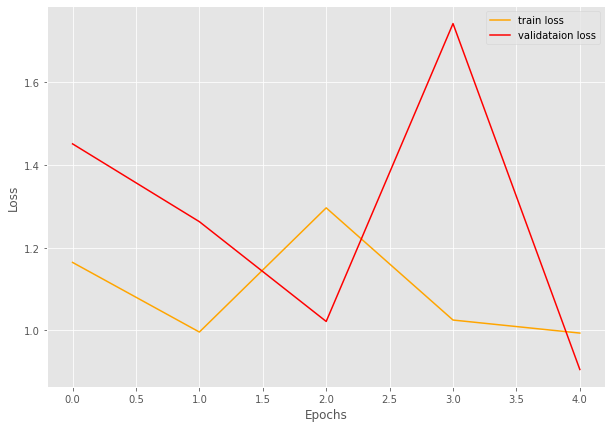

In [32]:
# save the trained model to disk
#torch.save({
#            'epoch': epochs,
#            'model_state_dict': model.state_dict(),
#            'optimizer_state_dict': optimizer.state_dict(),
#            'loss': criterion,
#            }, currentDirPath + "TrainingData/D2/"+ 'outputs/model.pth')
# plot and save the train and validation line graphs
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(valid_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png')
plt.show()